In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
import seaborn as sns


from datetime import datetime

set_style("whitegrid")

### Importing the Data

In [2]:
sp500 = pd.read_csv('HistoricalData_1698682901398.csv')
sp500

,Date,Close/Last,Open,High,Low
0,10/27/2023,4117.37,4152.93,4156.70,4103.78
1,10/26/2023,4137.23,4175.99,4183.60,4127.90
2,10/25/2023,4186.77,4232.42,4232.42,4181.42
3,10/24/2023,4247.68,4235.79,4259.38,4219.43
4,10/23/2023,4217.04,4210.40,4255.84,4189.22
...,...,...,...,...,...
2531,11/05/2013,1762.97,1765.67,1767.03,1755.76
2532,11/04/2013,1767.93,1763.40,1768.78,1761.56
2533,11/01/2013,1761.64,1758.70,1765.67,1752.70
2534,10/31/2013,1756.54,1763.24,1768.53,1755.72


In [3]:
# Reversing the order of the rows so that the dates are increasing.
sp500 = sp500.loc[::-1].reset_index(drop=True) 
sp500

,Date,Close/Last,Open,High,Low
0,10/30/2013,1763.31,1772.27,1775.22,1757.24
1,10/31/2013,1756.54,1763.24,1768.53,1755.72
2,11/01/2013,1761.64,1758.70,1765.67,1752.70
3,11/04/2013,1767.93,1763.40,1768.78,1761.56
4,11/05/2013,1762.97,1765.67,1767.03,1755.76
...,...,...,...,...,...
2531,10/23/2023,4217.04,4210.40,4255.84,4189.22
2532,10/24/2023,4247.68,4235.79,4259.38,4219.43
2533,10/25/2023,4186.77,4232.42,4232.42,4181.42
2534,10/26/2023,4137.23,4175.99,4183.60,4127.90


In [4]:
sp500.rename(columns = {"Close/Last":"Close"},inplace=True)
sp500

,Date,Close,Open,High,Low
0,10/30/2013,1763.31,1772.27,1775.22,1757.24
1,10/31/2013,1756.54,1763.24,1768.53,1755.72
2,11/01/2013,1761.64,1758.70,1765.67,1752.70
3,11/04/2013,1767.93,1763.40,1768.78,1761.56
4,11/05/2013,1762.97,1765.67,1767.03,1755.76
...,...,...,...,...,...
2531,10/23/2023,4217.04,4210.40,4255.84,4189.22
2532,10/24/2023,4247.68,4235.79,4259.38,4219.43
2533,10/25/2023,4186.77,4232.42,4232.42,4181.42
2534,10/26/2023,4137.23,4175.99,4183.60,4127.90


In [5]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536 entries, 0 to 2535
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2536 non-null   object 
 1   Close   2536 non-null   float64
 2   Open    2536 non-null   float64
 3   High    2536 non-null   float64
 4   Low     2536 non-null   float64
dtypes: float64(4), object(1)
memory usage: 99.2+ KB


In [6]:
type(sp500.Date[1]) #Each Date entry is being read as a string. 

str

In [7]:
# We convert the Date column to datetime format.
sp500.Date = pd.to_datetime(sp500.Date, format="%m/%d/%Y")
sp500

,Date,Close,Open,High,Low
0,2013-10-30,1763.31,1772.27,1775.22,1757.24
1,2013-10-31,1756.54,1763.24,1768.53,1755.72
2,2013-11-01,1761.64,1758.70,1765.67,1752.70
3,2013-11-04,1767.93,1763.40,1768.78,1761.56
4,2013-11-05,1762.97,1765.67,1767.03,1755.76
...,...,...,...,...,...
2531,2023-10-23,4217.04,4210.40,4255.84,4189.22
2532,2023-10-24,4247.68,4235.79,4259.38,4219.43
2533,2023-10-25,4186.77,4232.42,4232.42,4181.42
2534,2023-10-26,4137.23,4175.99,4183.60,4127.90


In [8]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536 entries, 0 to 2535
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2536 non-null   datetime64[ns]
 1   Close   2536 non-null   float64       
 2   Open    2536 non-null   float64       
 3   High    2536 non-null   float64       
 4   Low     2536 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 99.2 KB


### Trend of the Data

We have to remember that the nature of the trend depends on what time interval we plot the data for. We find out the trend for the Closing, Opening, Highest, Lowest values for the last 10 years.

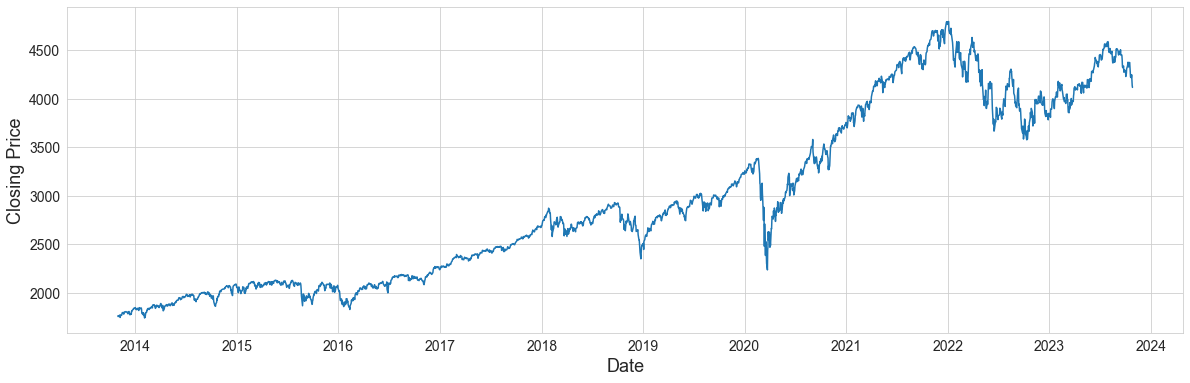

In [9]:
plt.figure(figsize=(20,6))

plt.plot(sp500.Date, sp500.Close)

plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

It looks like the Closing value of S&P 500 Index follows an increasing trend.  

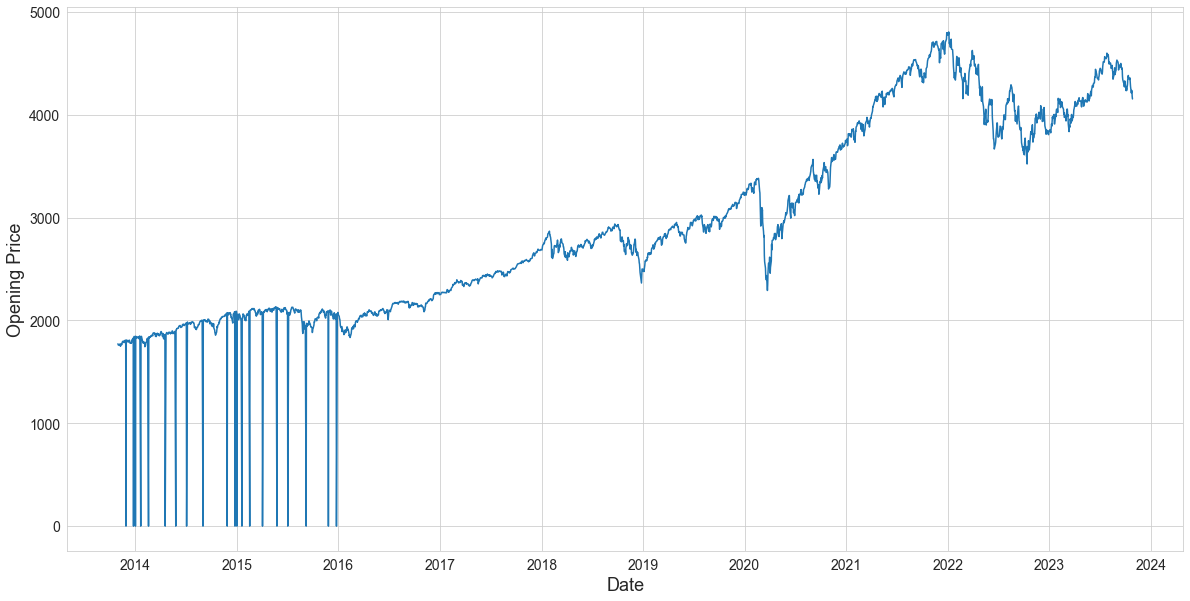

In [10]:
plt.figure(figsize=(20,10))

plt.plot(sp500.Date, sp500.Open)

plt.xlabel("Date", fontsize=18)
plt.ylabel("Opening Price", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

It looks like the opening price follows an increasing trend overall.

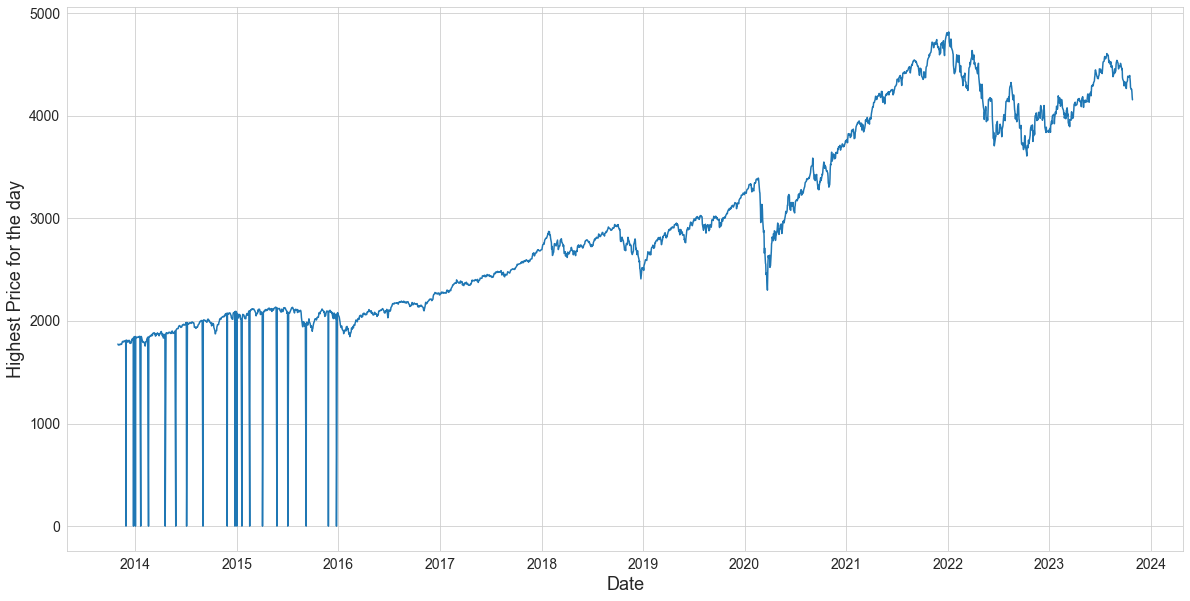

In [11]:
plt.figure(figsize=(20,10))

plt.plot(sp500.Date, sp500.High)

plt.xlabel("Date", fontsize=18)
plt.ylabel("Highest Price for the day", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

It looks like the Highest price follows an increasing trend overall.

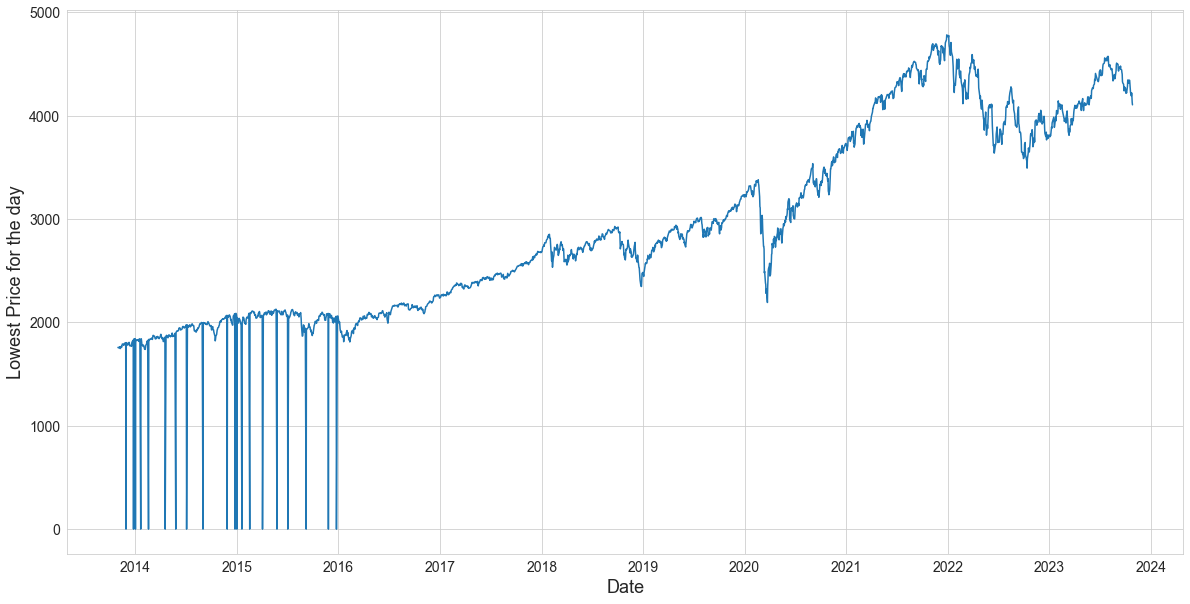

In [12]:
plt.figure(figsize=(20,10))

plt.plot(sp500.Date, sp500.Low)

plt.xlabel("Date", fontsize=18)
plt.ylabel("Lowest Price for the day", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

It looks like the Lowest price follows an increasing trend overall.

We subset our dataset to study why we are seeing the major drops in opening value, highest value and lowest value .

In [13]:
sp500_subset = sp500.loc[(sp500.Date<='2016') & (sp500.Date>='2013')]
sp500_subset

,Date,Close,Open,High,Low
0,2013-10-30,1763.31,1772.27,1775.22,1757.24
1,2013-10-31,1756.54,1763.24,1768.53,1755.72
2,2013-11-01,1761.64,1758.70,1765.67,1752.70
3,2013-11-04,1767.93,1763.40,1768.78,1761.56
4,2013-11-05,1762.97,1765.67,1767.03,1755.76
...,...,...,...,...,...
562,2015-12-25,2060.99,0.00,0.00,0.00
563,2015-12-28,2056.50,2057.77,2057.77,2044.20
564,2015-12-29,2078.36,2060.54,2081.56,2060.54
565,2015-12-30,2063.36,2077.34,2077.34,2061.97


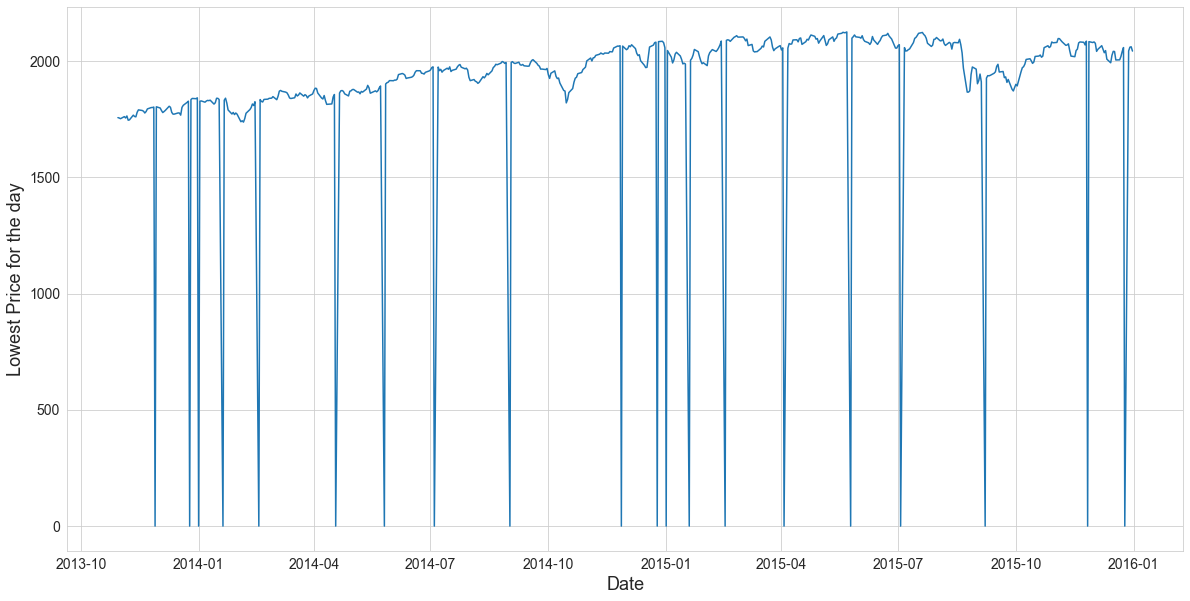

In [14]:
plt.figure(figsize=(20,10))

plt.plot(sp500_subset.Date, sp500_subset.Low)

plt.xlabel("Date", fontsize=18)
plt.ylabel("Lowest Price for the day", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [15]:
sp500_subset

,Date,Close,Open,High,Low
0,2013-10-30,1763.31,1772.27,1775.22,1757.24
1,2013-10-31,1756.54,1763.24,1768.53,1755.72
2,2013-11-01,1761.64,1758.70,1765.67,1752.70
3,2013-11-04,1767.93,1763.40,1768.78,1761.56
4,2013-11-05,1762.97,1765.67,1767.03,1755.76
...,...,...,...,...,...
562,2015-12-25,2060.99,0.00,0.00,0.00
563,2015-12-28,2056.50,2057.77,2057.77,2044.20
564,2015-12-29,2078.36,2060.54,2081.56,2060.54
565,2015-12-30,2063.36,2077.34,2077.34,2061.97


In [16]:
sp500_subset['Low'].value_counts()

0.00       20
1757.24     1
2072.37     1
2091.51     1
2092.33     1
           ..
1965.34     1
1969.86     1
1959.63     1
1952.86     1
2043.62     1
Name: Low, Length: 548, dtype: int64

The drops are the result of values becoming 0 on several days. 

In [17]:
sp500['Low'].value_counts()

0.00       20
2041.88     3
2194.51     2
2697.77     2
2159.07     2
           ..
2365.51     1
2361.01     1
2354.54     1
2363.04     1
4103.78     1
Name: Low, Length: 2506, dtype: int64

In [18]:
sp500['High'].value_counts()

0.00       20
2480.38     2
2775.99     2
2271.78     2
4195.44     2
           ..
2369.08     1
2376.86     1
2374.42     1
2368.55     1
4156.70     1
Name: High, Length: 2500, dtype: int64

In [19]:
sp500['Open'].value_counts()

0.00       20
2173.29     2
2769.28     2
4402.95     2
2062.50     2
           ..
2371.56     1
2368.55     1
2370.34     1
2387.71     1
4152.93     1
Name: Open, Length: 2497, dtype: int64

In [20]:
sp500['Close'].value_counts()

2926.46    2
1807.23    2
2126.06    2
2439.07    2
2066.66    2
          ..
2358.84    1
2360.16    1
2352.95    1
2357.49    1
4117.37    1
Name: Close, Length: 2503, dtype: int64

So, the columns High, Low and Open become 0 twenty times. Are these the same twenty days?

In [21]:
sp500.Date[sp500['Low']==0]

21    2013-11-28
40    2013-12-25
45    2014-01-01
58    2014-01-20
78    2014-02-17
122   2014-04-18
148   2014-05-26
177   2014-07-04
218   2014-09-01
281   2014-11-27
301   2014-12-25
306   2015-01-01
318   2015-01-19
338   2015-02-16
372   2015-04-03
408   2015-05-25
437   2015-07-03
483   2015-09-07
541   2015-11-26
562   2015-12-25
Name: Date, dtype: datetime64[ns]

In [22]:
sp500.Date[sp500['High']==0]

21    2013-11-28
40    2013-12-25
45    2014-01-01
58    2014-01-20
78    2014-02-17
122   2014-04-18
148   2014-05-26
177   2014-07-04
218   2014-09-01
281   2014-11-27
301   2014-12-25
306   2015-01-01
318   2015-01-19
338   2015-02-16
372   2015-04-03
408   2015-05-25
437   2015-07-03
483   2015-09-07
541   2015-11-26
562   2015-12-25
Name: Date, dtype: datetime64[ns]

In [23]:
sp500.Date[sp500['Open']==0]

21    2013-11-28
40    2013-12-25
45    2014-01-01
58    2014-01-20
78    2014-02-17
122   2014-04-18
148   2014-05-26
177   2014-07-04
218   2014-09-01
281   2014-11-27
301   2014-12-25
306   2015-01-01
318   2015-01-19
338   2015-02-16
372   2015-04-03
408   2015-05-25
437   2015-07-03
483   2015-09-07
541   2015-11-26
562   2015-12-25
Name: Date, dtype: datetime64[ns]

In [24]:
sp500.Date[sp500['Low']==0]==sp500.Date[sp500['High']==0]

21     True
40     True
45     True
58     True
78     True
122    True
148    True
177    True
218    True
281    True
301    True
306    True
318    True
338    True
372    True
408    True
437    True
483    True
541    True
562    True
Name: Date, dtype: bool

In [25]:
sp500.Date[sp500['Low']==0]==sp500.Date[sp500['Open']==0]

21     True
40     True
45     True
58     True
78     True
122    True
148    True
177    True
218    True
281    True
301    True
306    True
318    True
338    True
372    True
408    True
437    True
483    True
541    True
562    True
Name: Date, dtype: bool

Yes! They are the same dates. Are these errors? 
If yes, we should remove/replace these 20 rows.

### Removing the above 20 rows (rows with 0 value of stock for High, Low and Open)

U.S. stock markets are closed on the following days: New Year's Day, Martin Luther King, Jr. Day, President's Day, Good Friday, Memorial Day, Juneteenth, Independence Day, Labor Day, Thanksgiving Day, and Christmas.

The above dates are the dates on which one of these days fell, therefore, the 0 value for "Open", "High", "Low".

Let us remove these rows.

In [26]:
L = list(sp500.index[sp500['Low']==0])
L

[21,
 40,
 45,
 58,
 78,
 122,
 148,
 177,
 218,
 281,
 301,
 306,
 318,
 338,
 372,
 408,
 437,
 483,
 541,
 562]

In [27]:
sp500 = sp500.drop(labels = L, axis = 0)

In [28]:
sp500 = sp500.reset_index(drop=True)

In [29]:
sp500

,Date,Close,Open,High,Low
0,2013-10-30,1763.31,1772.27,1775.22,1757.24
1,2013-10-31,1756.54,1763.24,1768.53,1755.72
2,2013-11-01,1761.64,1758.70,1765.67,1752.70
3,2013-11-04,1767.93,1763.40,1768.78,1761.56
4,2013-11-05,1762.97,1765.67,1767.03,1755.76
...,...,...,...,...,...
2511,2023-10-23,4217.04,4210.40,4255.84,4189.22
2512,2023-10-24,4247.68,4235.79,4259.38,4219.43
2513,2023-10-25,4186.77,4232.42,4232.42,4181.42
2514,2023-10-26,4137.23,4175.99,4183.60,4127.90


### Adding a column, Momentum, to our dataset to study the increasing/ decreasing nature of the S&P 500 Index.

In [30]:
sp500['Prev_day'] = sp500["Close"].shift(1)

In [31]:
sp500

,Date,Close,Open,High,Low,Prev_day
0,2013-10-30,1763.31,1772.27,1775.22,1757.24,NaN
1,2013-10-31,1756.54,1763.24,1768.53,1755.72,1763.31
2,2013-11-01,1761.64,1758.70,1765.67,1752.70,1756.54
3,2013-11-04,1767.93,1763.40,1768.78,1761.56,1761.64
4,2013-11-05,1762.97,1765.67,1767.03,1755.76,1767.93
...,...,...,...,...,...,...
2511,2023-10-23,4217.04,4210.40,4255.84,4189.22,4224.16
2512,2023-10-24,4247.68,4235.79,4259.38,4219.43,4217.04
2513,2023-10-25,4186.77,4232.42,4232.42,4181.42,4247.68
2514,2023-10-26,4137.23,4175.99,4183.60,4127.90,4186.77


To study the increasing/ decreasing nature, we create a new column called "Momentum" (=1 if current day's closing price is greater than the previous day and 0 otherwise.) 

In [32]:
sp500['Momentum'] = (sp500['Close']>sp500['Prev_day']).astype(int)

In [33]:
sp500

,Date,Close,Open,High,Low,Prev_day,Momentum
0,2013-10-30,1763.31,1772.27,1775.22,1757.24,NaN,0
1,2013-10-31,1756.54,1763.24,1768.53,1755.72,1763.31,0
2,2013-11-01,1761.64,1758.70,1765.67,1752.70,1756.54,1
3,2013-11-04,1767.93,1763.40,1768.78,1761.56,1761.64,1
4,2013-11-05,1762.97,1765.67,1767.03,1755.76,1767.93,0
...,...,...,...,...,...,...,...
2511,2023-10-23,4217.04,4210.40,4255.84,4189.22,4224.16,0
2512,2023-10-24,4247.68,4235.79,4259.38,4219.43,4217.04,1
2513,2023-10-25,4186.77,4232.42,4232.42,4181.42,4247.68,0
2514,2023-10-26,4137.23,4175.99,4183.60,4127.90,4186.77,0


I will remove the first row as we do not have information about the Closing price of the day before.

In [34]:
sp500 = sp500.drop(labels = [0],axis = 0)

In [35]:
sp500 = sp500.reset_index(drop=True)

In [36]:
sp500

,Date,Close,Open,High,Low,Prev_day,Momentum
0,2013-10-31,1756.54,1763.24,1768.53,1755.72,1763.31,0
1,2013-11-01,1761.64,1758.70,1765.67,1752.70,1756.54,1
2,2013-11-04,1767.93,1763.40,1768.78,1761.56,1761.64,1
3,2013-11-05,1762.97,1765.67,1767.03,1755.76,1767.93,0
4,2013-11-06,1770.49,1765.00,1773.74,1764.40,1762.97,1
...,...,...,...,...,...,...,...
2510,2023-10-23,4217.04,4210.40,4255.84,4189.22,4224.16,0
2511,2023-10-24,4247.68,4235.79,4259.38,4219.43,4217.04,1
2512,2023-10-25,4186.77,4232.42,4232.42,4181.42,4247.68,0
2513,2023-10-26,4137.23,4175.99,4183.60,4127.90,4186.77,0


### Features:

In [37]:
# We add a new feature called Index momentum 
# which is defined as the average value of the momentum in previous 5 days.

In [38]:
sp500["Momentum-1"] = sp500["Momentum"].shift(1)

In [39]:
sp500["Momentum-2"] = sp500["Momentum"].shift(2)

In [40]:
sp500["Momentum-3"] = sp500["Momentum"].shift(3)

In [41]:
sp500["Momentum-4"] = sp500["Momentum"].shift(4)

In [42]:
sp500["Momentum-5"] = sp500["Momentum"].shift(5)

In [43]:
sp500

,Date,Close,Open,High,Low,Prev_day,Momentum,Momentum-1,Momentum-2,Momentum-3,Momentum-4,Momentum-5
0,2013-10-31,1756.54,1763.24,1768.53,1755.72,1763.31,0,NaN,NaN,NaN,NaN,NaN
1,2013-11-01,1761.64,1758.70,1765.67,1752.70,1756.54,1,0.0,NaN,NaN,NaN,NaN
2,2013-11-04,1767.93,1763.40,1768.78,1761.56,1761.64,1,1.0,0.0,NaN,NaN,NaN
3,2013-11-05,1762.97,1765.67,1767.03,1755.76,1767.93,0,1.0,1.0,0.0,NaN,NaN
4,2013-11-06,1770.49,1765.00,1773.74,1764.40,1762.97,1,0.0,1.0,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2510,2023-10-23,4217.04,4210.40,4255.84,4189.22,4224.16,0,0.0,0.0,0.0,0.0,1.0
2511,2023-10-24,4247.68,4235.79,4259.38,4219.43,4217.04,1,0.0,0.0,0.0,0.0,0.0
2512,2023-10-25,4186.77,4232.42,4232.42,4181.42,4247.68,0,1.0,0.0,0.0,0.0,0.0
2513,2023-10-26,4137.23,4175.99,4183.60,4127.90,4186.77,0,0.0,1.0,0.0,0.0,0.0


In [44]:
sp500["Index Momentum"] = (sp500["Momentum-1"]+sp500["Momentum-2"]+sp500["Momentum-3"]+sp500["Momentum-4"]+sp500["Momentum-5"])/5

In [45]:
sp500

,Date,Close,Open,High,Low,Prev_day,Momentum,Momentum-1,Momentum-2,Momentum-3,Momentum-4,Momentum-5,Index Momentum
0,2013-10-31,1756.54,1763.24,1768.53,1755.72,1763.31,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-11-01,1761.64,1758.70,1765.67,1752.70,1756.54,1,0.0,NaN,NaN,NaN,NaN,NaN
2,2013-11-04,1767.93,1763.40,1768.78,1761.56,1761.64,1,1.0,0.0,NaN,NaN,NaN,NaN
3,2013-11-05,1762.97,1765.67,1767.03,1755.76,1767.93,0,1.0,1.0,0.0,NaN,NaN,NaN
4,2013-11-06,1770.49,1765.00,1773.74,1764.40,1762.97,1,0.0,1.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,2023-10-23,4217.04,4210.40,4255.84,4189.22,4224.16,0,0.0,0.0,0.0,0.0,1.0,0.2
2511,2023-10-24,4247.68,4235.79,4259.38,4219.43,4217.04,1,0.0,0.0,0.0,0.0,0.0,0.0
2512,2023-10-25,4186.77,4232.42,4232.42,4181.42,4247.68,0,1.0,0.0,0.0,0.0,0.0,0.2
2513,2023-10-26,4137.23,4175.99,4183.60,4127.90,4186.77,0,0.0,1.0,0.0,0.0,0.0,0.2


In [46]:
# We want to add a column called Volatility which 
# is defined as (closing price of the previous day - closing price of today)/(closing price of the previous day)

In [47]:
sp500["Volatility"] = (sp500['Prev_day']-sp500['Close'])/(sp500['Prev_day'])

In [48]:
sp500

,Date,Close,Open,High,Low,Prev_day,Momentum,Momentum-1,Momentum-2,Momentum-3,Momentum-4,Momentum-5,Index Momentum,Volatility
0,2013-10-31,1756.54,1763.24,1768.53,1755.72,1763.31,0,NaN,NaN,NaN,NaN,NaN,NaN,0.003839
1,2013-11-01,1761.64,1758.70,1765.67,1752.70,1756.54,1,0.0,NaN,NaN,NaN,NaN,NaN,-0.002903
2,2013-11-04,1767.93,1763.40,1768.78,1761.56,1761.64,1,1.0,0.0,NaN,NaN,NaN,NaN,-0.003571
3,2013-11-05,1762.97,1765.67,1767.03,1755.76,1767.93,0,1.0,1.0,0.0,NaN,NaN,NaN,0.002806
4,2013-11-06,1770.49,1765.00,1773.74,1764.40,1762.97,1,0.0,1.0,1.0,0.0,NaN,NaN,-0.004266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,2023-10-23,4217.04,4210.40,4255.84,4189.22,4224.16,0,0.0,0.0,0.0,0.0,1.0,0.2,0.001686
2511,2023-10-24,4247.68,4235.79,4259.38,4219.43,4217.04,1,0.0,0.0,0.0,0.0,0.0,0.0,-0.007266
2512,2023-10-25,4186.77,4232.42,4232.42,4181.42,4247.68,0,1.0,0.0,0.0,0.0,0.0,0.2,0.014340
2513,2023-10-26,4137.23,4175.99,4183.60,4127.90,4186.77,0,0.0,1.0,0.0,0.0,0.0,0.2,0.011833


In [49]:
# We add a new feature called Index Volatility 
#which is defined as the average value of Volatility in the last 5 days.

In [50]:
sp500["Volatility-1"] = sp500["Volatility"].shift(1)

In [51]:
sp500["Volatility-2"] = sp500["Volatility"].shift(2)

In [52]:
sp500["Volatility-3"] = sp500["Volatility"].shift(3)

In [53]:
sp500["Volatility-4"] = sp500["Volatility"].shift(4)

In [54]:
sp500["Volatility-5"] = sp500["Volatility"].shift(5)

In [55]:
sp500

,Date,Close,Open,High,Low,Prev_day,Momentum,Momentum-1,Momentum-2,Momentum-3,Momentum-4,Momentum-5,Index Momentum,Volatility,Volatility-1,Volatility-2,Volatility-3,Volatility-4,Volatility-5
0,2013-10-31,1756.54,1763.24,1768.53,1755.72,1763.31,0,NaN,NaN,NaN,NaN,NaN,NaN,0.003839,NaN,NaN,NaN,NaN,NaN
1,2013-11-01,1761.64,1758.70,1765.67,1752.70,1756.54,1,0.0,NaN,NaN,NaN,NaN,NaN,-0.002903,0.003839,NaN,NaN,NaN,NaN
2,2013-11-04,1767.93,1763.40,1768.78,1761.56,1761.64,1,1.0,0.0,NaN,NaN,NaN,NaN,-0.003571,-0.002903,0.003839,NaN,NaN,NaN
3,2013-11-05,1762.97,1765.67,1767.03,1755.76,1767.93,0,1.0,1.0,0.0,NaN,NaN,NaN,0.002806,-0.003571,-0.002903,0.003839,NaN,NaN
4,2013-11-06,1770.49,1765.00,1773.74,1764.40,1762.97,1,0.0,1.0,1.0,0.0,NaN,NaN,-0.004266,0.002806,-0.003571,-0.002903,0.003839,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,2023-10-23,4217.04,4210.40,4255.84,4189.22,4224.16,0,0.0,0.0,0.0,0.0,1.0,0.2,0.001686,0.012585,0.008483,0.013400,0.000098,-0.010594
2511,2023-10-24,4247.68,4235.79,4259.38,4219.43,4217.04,1,0.0,0.0,0.0,0.0,0.0,0.0,-0.007266,0.001686,0.012585,0.008483,0.013400,0.000098
2512,2023-10-25,4186.77,4232.42,4232.42,4181.42,4247.68,0,1.0,0.0,0.0,0.0,0.0,0.2,0.014340,-0.007266,0.001686,0.012585,0.008483,0.013400
2513,2023-10-26,4137.23,4175.99,4183.60,4127.90,4186.77,0,0.0,1.0,0.0,0.0,0.0,0.2,0.011833,0.014340,-0.007266,0.001686,0.012585,0.008483


In [56]:
sp500["Index Volatility"] = (sp500["Volatility-1"]+sp500["Volatility-2"]+sp500["Volatility-3"]+sp500["Volatility-4"]+sp500["Volatility-5"])/5

In [57]:
sp500

,Date,Close,Open,High,Low,Prev_day,Momentum,Momentum-1,Momentum-2,Momentum-3,Momentum-4,Momentum-5,Index Momentum,Volatility,Volatility-1,Volatility-2,Volatility-3,Volatility-4,Volatility-5,Index Volatility
0,2013-10-31,1756.54,1763.24,1768.53,1755.72,1763.31,0,NaN,NaN,NaN,NaN,NaN,NaN,0.003839,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-11-01,1761.64,1758.70,1765.67,1752.70,1756.54,1,0.0,NaN,NaN,NaN,NaN,NaN,-0.002903,0.003839,NaN,NaN,NaN,NaN,NaN
2,2013-11-04,1767.93,1763.40,1768.78,1761.56,1761.64,1,1.0,0.0,NaN,NaN,NaN,NaN,-0.003571,-0.002903,0.003839,NaN,NaN,NaN,NaN
3,2013-11-05,1762.97,1765.67,1767.03,1755.76,1767.93,0,1.0,1.0,0.0,NaN,NaN,NaN,0.002806,-0.003571,-0.002903,0.003839,NaN,NaN,NaN
4,2013-11-06,1770.49,1765.00,1773.74,1764.40,1762.97,1,0.0,1.0,1.0,0.0,NaN,NaN,-0.004266,0.002806,-0.003571,-0.002903,0.003839,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,2023-10-23,4217.04,4210.40,4255.84,4189.22,4224.16,0,0.0,0.0,0.0,0.0,1.0,0.2,0.001686,0.012585,0.008483,0.013400,0.000098,-0.010594,0.004794
2511,2023-10-24,4247.68,4235.79,4259.38,4219.43,4217.04,1,0.0,0.0,0.0,0.0,0.0,0.0,-0.007266,0.001686,0.012585,0.008483,0.013400,0.000098,0.007250
2512,2023-10-25,4186.77,4232.42,4232.42,4181.42,4247.68,0,1.0,0.0,0.0,0.0,0.0,0.2,0.014340,-0.007266,0.001686,0.012585,0.008483,0.013400,0.005778
2513,2023-10-26,4137.23,4175.99,4183.60,4127.90,4186.77,0,0.0,1.0,0.0,0.0,0.0,0.2,0.011833,0.014340,-0.007266,0.001686,0.012585,0.008483,0.005966


In [58]:
#We drop the first 5 rows because of NaN values.

In [59]:
sp500 = sp500.drop(labels = [0,1,2,3,4],axis = 0)

In [60]:
sp500 = sp500.reset_index(drop=True)

In [61]:
sp500

,Date,Close,Open,High,Low,Prev_day,Momentum,Momentum-1,Momentum-2,Momentum-3,Momentum-4,Momentum-5,Index Momentum,Volatility,Volatility-1,Volatility-2,Volatility-3,Volatility-4,Volatility-5,Index Volatility
0,2013-11-07,1747.15,1770.74,1774.54,1746.20,1770.49,0,1.0,0.0,1.0,1.0,0.0,0.6,0.013183,-0.004266,0.002806,-0.003571,-0.002903,0.003839,-0.000819
1,2013-11-08,1770.61,1748.37,1770.78,1747.63,1747.15,1,0.0,1.0,0.0,1.0,1.0,0.6,-0.013428,0.013183,-0.004266,0.002806,-0.003571,-0.002903,0.001050
2,2013-11-11,1771.89,1769.96,1773.44,1767.85,1770.61,1,1.0,0.0,1.0,0.0,1.0,0.6,-0.000723,-0.013428,0.013183,-0.004266,0.002806,-0.003571,-0.001055
3,2013-11-12,1767.69,1769.51,1771.78,1762.29,1771.89,0,1.0,1.0,0.0,1.0,0.0,0.6,0.002370,-0.000723,-0.013428,0.013183,-0.004266,0.002806,-0.000486
4,2013-11-13,1782.00,1764.37,1782.00,1760.64,1767.69,1,0.0,1.0,1.0,0.0,1.0,0.6,-0.008095,0.002370,-0.000723,-0.013428,0.013183,-0.004266,-0.000573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2505,2023-10-23,4217.04,4210.40,4255.84,4189.22,4224.16,0,0.0,0.0,0.0,0.0,1.0,0.2,0.001686,0.012585,0.008483,0.013400,0.000098,-0.010594,0.004794
2506,2023-10-24,4247.68,4235.79,4259.38,4219.43,4217.04,1,0.0,0.0,0.0,0.0,0.0,0.0,-0.007266,0.001686,0.012585,0.008483,0.013400,0.000098,0.007250
2507,2023-10-25,4186.77,4232.42,4232.42,4181.42,4247.68,0,1.0,0.0,0.0,0.0,0.0,0.2,0.014340,-0.007266,0.001686,0.012585,0.008483,0.013400,0.005778
2508,2023-10-26,4137.23,4175.99,4183.60,4127.90,4186.77,0,0.0,1.0,0.0,0.0,0.0,0.2,0.011833,0.014340,-0.007266,0.001686,0.012585,0.008483,0.005966


### Removing the Columns we do not need in our analysis

In [62]:
sp500 = sp500.drop(["Open","High","Low","Prev_day","Momentum-1","Momentum-2","Momentum-3","Momentum-4","Momentum-5","Volatility-1","Volatility-2","Volatility-3","Volatility-4","Volatility-5"],axis = 1)

In [63]:
sp500

,Date,Close,Momentum,Index Momentum,Volatility,Index Volatility
0,2013-11-07,1747.15,0,0.6,0.013183,-0.000819
1,2013-11-08,1770.61,1,0.6,-0.013428,0.001050
2,2013-11-11,1771.89,1,0.6,-0.000723,-0.001055
3,2013-11-12,1767.69,0,0.6,0.002370,-0.000486
4,2013-11-13,1782.00,1,0.6,-0.008095,-0.000573
...,...,...,...,...,...,...
2505,2023-10-23,4217.04,0,0.2,0.001686,0.004794
2506,2023-10-24,4247.68,1,0.0,-0.007266,0.007250
2507,2023-10-25,4186.77,0,0.2,0.014340,0.005778
2508,2023-10-26,4137.23,0,0.2,0.011833,0.005966


### Predicting the increasing/decreasing nature of the stock prices

#### Train-test split

In [64]:
from sklearn.model_selection import TimeSeriesSplit

In [65]:
sp500

,Date,Close,Momentum,Index Momentum,Volatility,Index Volatility
0,2013-11-07,1747.15,0,0.6,0.013183,-0.000819
1,2013-11-08,1770.61,1,0.6,-0.013428,0.001050
2,2013-11-11,1771.89,1,0.6,-0.000723,-0.001055
3,2013-11-12,1767.69,0,0.6,0.002370,-0.000486
4,2013-11-13,1782.00,1,0.6,-0.008095,-0.000573
...,...,...,...,...,...,...
2505,2023-10-23,4217.04,0,0.2,0.001686,0.004794
2506,2023-10-24,4247.68,1,0.0,-0.007266,0.007250
2507,2023-10-25,4186.77,0,0.2,0.014340,0.005778
2508,2023-10-26,4137.23,0,0.2,0.011833,0.005966


In [66]:
tss = TimeSeriesSplit(n_splits = 3)

In [67]:
sp500.set_index('Date', inplace=True)
sp500.sort_index(inplace=True)
X = sp500.drop(labels=['Momentum'], axis=1)
y = sp500['Momentum']

In [68]:
sp500

,Close,Momentum,Index Momentum,Volatility,Index Volatility
Date,,,,,
2013-11-07,1747.15,0,0.6,0.013183,-0.000819
2013-11-08,1770.61,1,0.6,-0.013428,0.001050
2013-11-11,1771.89,1,0.6,-0.000723,-0.001055
2013-11-12,1767.69,0,0.6,0.002370,-0.000486
2013-11-13,1782.00,1,0.6,-0.008095,-0.000573
...,...,...,...,...,...
2023-10-23,4217.04,0,0.2,0.001686,0.004794
2023-10-24,4247.68,1,0.0,-0.007266,0.007250
2023-10-25,4186.77,0,0.2,0.014340,0.005778


In [69]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [70]:
X_train.index

DatetimeIndex(['2013-11-07', '2013-11-08', '2013-11-11', '2013-11-12',
               '2013-11-13', '2013-11-14', '2013-11-15', '2013-11-18',
               '2013-11-19', '2013-11-20',
               ...
               '2021-04-20', '2021-04-21', '2021-04-22', '2021-04-23',
               '2021-04-26', '2021-04-27', '2021-04-28', '2021-04-29',
               '2021-04-30', '2021-05-03'],
              dtype='datetime64[ns]', name='Date', length=1883, freq=None)

In [71]:
X_test.index

DatetimeIndex(['2021-05-04', '2021-05-05', '2021-05-06', '2021-05-07',
               '2021-05-10', '2021-05-11', '2021-05-12', '2021-05-13',
               '2021-05-14', '2021-05-17',
               ...
               '2023-10-16', '2023-10-17', '2023-10-18', '2023-10-19',
               '2023-10-20', '2023-10-23', '2023-10-24', '2023-10-25',
               '2023-10-26', '2023-10-27'],
              dtype='datetime64[ns]', name='Date', length=627, freq=None)

In [72]:
#Plotting to see if we did correct split i.e. test set is older than the train set.

<AxesSubplot:xlabel='Date'>

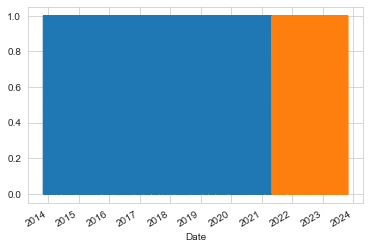

In [73]:
y_train.groupby('Date').mean().plot()
y_test.groupby('Date').mean().plot()

## Classification Models

### 1. Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
logreg = LogisticRegression(random_state=16)

In [76]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=16)

In [77]:
y_pred_logreg = logreg.predict(X_test)

In [78]:
from sklearn import metrics
cnf_matrix_log_reg = metrics.confusion_matrix(y_test, y_pred_logreg)
cnf_matrix_log_reg

array([[  0, 317],
       [  0, 310]])

Text(0.5, 257.44, 'Predicted label')

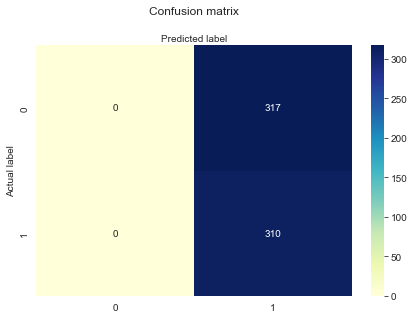

In [79]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_log_reg), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Text(0.5,257.44,'Predicted label');

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       317
           1       0.49      1.00      0.66       310

    accuracy                           0.49       627
   macro avg       0.25      0.50      0.33       627
weighted avg       0.24      0.49      0.33       627



/Users/kriti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kriti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kriti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
from sklearn.metrics import accuracy_score

In [82]:
accuracy_score(y_test,y_pred_logreg)

0.4944178628389155

### 2. K-Nearest Neighbours (KNN)

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
def KNN(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    return pred

In [85]:
print(classification_report(y_test, KNN(1)))

              precision    recall  f1-score   support

           0       0.56      0.19      0.29       317
           1       0.51      0.85      0.63       310

    accuracy                           0.52       627
   macro avg       0.53      0.52      0.46       627
weighted avg       0.53      0.52      0.46       627



In [86]:
print(classification_report(y_test, KNN(2)))

              precision    recall  f1-score   support

           0       0.56      0.32      0.40       317
           1       0.52      0.75      0.61       310

    accuracy                           0.53       627
   macro avg       0.54      0.53      0.51       627
weighted avg       0.54      0.53      0.51       627



In [87]:
accuracy_knn = [accuracy_score(y_test,KNN(k)) for k in range(1,50)]

In [88]:
accuracy_knn

[0.5151515151515151,
 0.529505582137161,
 0.5199362041467305,
 0.532695374800638,
 0.5263157894736842,
 0.5534290271132376,
 0.532695374800638,
 0.5470494417862839,
 0.518341307814992,
 0.529505582137161,
 0.5135566188197768,
 0.5279106858054227,
 0.5055821371610846,
 0.5199362041467305,
 0.5167464114832536,
 0.5374800637958532,
 0.5247208931419458,
 0.5454545454545454,
 0.5151515151515151,
 0.5247208931419458,
 0.518341307814992,
 0.5279106858054227,
 0.5167464114832536,
 0.5215311004784688,
 0.5007974481658692,
 0.5087719298245614,
 0.5007974481658692,
 0.49920255183413076,
 0.49920255183413076,
 0.5007974481658692,
 0.49920255183413076,
 0.48963317384370014,
 0.49760765550239233,
 0.4960127591706539,
 0.49760765550239233,
 0.5039872408293461,
 0.49760765550239233,
 0.5023923444976076,
 0.4960127591706539,
 0.5039872408293461,
 0.4944178628389155,
 0.4944178628389155,
 0.4944178628389155,
 0.4944178628389155,
 0.4944178628389155,
 0.4944178628389155,
 0.4944178628389155,
 0.494417862

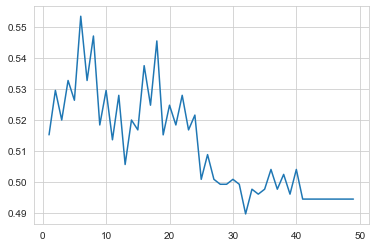

In [89]:
plt.plot([k for k in range(1,50)],accuracy_knn)

In [90]:
max(accuracy_knn) #This is for k = 6

0.5534290271132376

In [91]:
min(accuracy_knn)

0.48963317384370014

### 3. Naïve Bayes 

In [92]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [93]:
y_pred_gnb = gnb.predict(X_test)

In [94]:
from sklearn import metrics
cnf_matrix_gnb = metrics.confusion_matrix(y_test, y_pred_gnb)
cnf_matrix_gnb

array([[ 31, 286],
       [  0, 310]])

Text(0.5, 257.44, 'Predicted label')

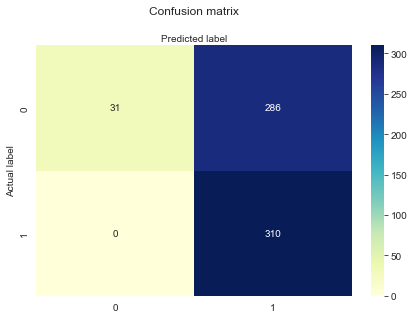

In [95]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_gnb), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       1.00      0.10      0.18       317
           1       0.52      1.00      0.68       310

    accuracy                           0.54       627
   macro avg       0.76      0.55      0.43       627
weighted avg       0.76      0.54      0.43       627



In [97]:
accuracy_score(y_test,y_pred_gnb)

0.543859649122807

### 4. Support Vector Machine (SVM)
Kernels: linear, poly, rbf, sigmoid

In [98]:
from sklearn import svm

In [99]:
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
y_pred_svm_linear = svm_linear.predict(X_test)
print(classification_report(y_test, y_pred_svm_linear))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       317
           1       0.49      1.00      0.66       310

    accuracy                           0.49       627
   macro avg       0.25      0.50      0.33       627
weighted avg       0.24      0.49      0.33       627



/Users/kriti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kriti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kriti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
svm_poly2 = svm.SVC(kernel='poly',degree = 2)
svm_poly2.fit(X_train,y_train)
y_pred_svm_poly2 = svm_poly2.predict(X_test)
print(classification_report(y_test, y_pred_svm_poly2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       317
           1       0.49      1.00      0.66       310

    accuracy                           0.49       627
   macro avg       0.25      0.50      0.33       627
weighted avg       0.24      0.49      0.33       627



/Users/kriti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kriti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kriti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train,y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test)
print(classification_report(y_test, y_pred_svm_rbf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       317
           1       0.49      1.00      0.66       310

    accuracy                           0.49       627
   macro avg       0.25      0.50      0.33       627
weighted avg       0.24      0.49      0.33       627



/Users/kriti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kriti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kriti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 5. Decision Tree Classification

In [102]:
from sklearn import tree

In [103]:
decision_tree = tree.DecisionTreeClassifier()

In [104]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [105]:
y_pred_dtree = decision_tree.predict(X_test)

In [106]:
metrics.confusion_matrix(y_test, y_pred_dtree)

array([[317,   0],
       [  0, 310]])

In [107]:
print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       310

    accuracy                           1.00       627
   macro avg       1.00      1.00      1.00       627
weighted avg       1.00      1.00      1.00       627



In [108]:
accuracy_score(y_test,y_pred_dtree)

1.0

### 6. Random Forest Classification

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
random_forest = RandomForestClassifier(max_depth=2, random_state=0)

In [111]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [112]:
y_pred_random_forest = random_forest.predict(X_test)

In [113]:
print(classification_report(y_test,y_pred_random_forest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       317
           1       1.00      1.00      1.00       310

    accuracy                           1.00       627
   macro avg       1.00      1.00      1.00       627
weighted avg       1.00      1.00      1.00       627

